# Home Credit Default Risk

### Reference

Start Here: A Gentle Introduction<br> 
https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
<br><br>
Home Credit : Complete EDA + Feature Importance ✓✓<br>
https://www.kaggle.com/codename007/home-credit-complete-eda-feature-importance
<br><br>
Kaggle: Home Credit Default Risk 첫 번째 모델 학습 및 성능 평가<br>
https://c11.kr/nt9a

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
pd.set_option('max_columns',500)
pd.set_option('max_rows',500)

In [8]:
application_train= pd.read_csv('application_train.csv')
application_test = pd.read_csv('application_test.csv')
bureau = pd.read_csv('bureau.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')
pos_cash_balance = pd.read_csv('POS_CASH_balance.csv')
credit_card_balance = pd.read_csv('credit_card_balance.csv')
previous_application = pd.read_csv('previous_application.csv')
installments_payments = pd.read_csv('installments_payments.csv')

In [9]:
print('shape of train : ', application_train.shape)
print('shape of test : ', application_test.shape)
print('shape of bureau : ', bureau.shape)
print('shape of bureau_balance : ', bureau_balance.shape)
print('shape of pos_cash_balance : ', pos_cash_balance.shape)
print('shape of credit_card_balance : ', credit_card_balance.shape)
print('shape of previous_application : ', previous_application.shape)
print('shape of installments_payments : ', installments_payments.shape)

shape of train :  (307511, 122)
shape of test :  (48744, 121)
shape of bureau :  (1716428, 17)
shape of bureau_balance :  (27299925, 3)
shape of pos_cash_balance :  (10001358, 8)
shape of credit_card_balance :  (3840312, 23)
shape of previous_application :  (1670214, 37)
shape of installments_payments :  (13605401, 8)


## Data Analysis

In [6]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [8]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [9]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [10]:
pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [11]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [12]:
credit_card_balance.columns.values #credit_card_balance.columns

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
       'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF'], dtype=object)

In [13]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
previous_application.columns.values # previous_application.columns

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

In [15]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


## EDA(Exploratory Data Analysis)
<br>
application_train의 target column를 살펴보자

In [16]:
application_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [17]:
application_train['TARGET'].value_counts()/application_train.shape[0] * 100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

(array([282686.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  24825.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

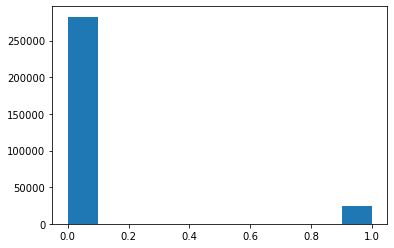

In [18]:
#sns.countplot(application_train['TARGET'])
plt.hist(application_train['TARGET'])

한쪽으로 치우쳐져 불균형 문제가 있다는 것을 볼 수 있다. 그리고 갚지 않은 대출보다 갚은 대출이 더 많다. 

In [19]:
application_train['AMT_INCOME_TOTAL'].unique()

array([202500. , 270000. ,  67500. , ...,  96768. , 546250.5, 113062.5])

In [20]:
application_train['AMT_INCOME_TOTAL'].value_counts()

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
101119.5        1
79425.0         1
101128.5        1
202275.0        1
262174.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

(array([3.07508e+05, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([2.56500000e+04, 1.17230850e+07, 2.34205200e+07, 3.51179550e+07,
        4.68153900e+07, 5.85128250e+07, 7.02102600e+07, 8.19076950e+07,
        9.36051300e+07, 1.05302565e+08, 1.17000000e+08]),
 <BarContainer object of 10 artists>)

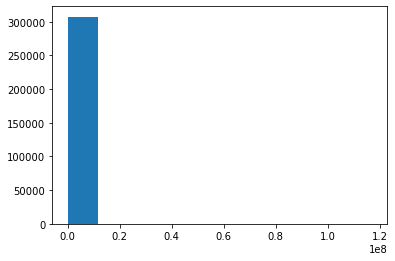

In [21]:
plt.hist(application_train['AMT_INCOME_TOTAL'])

(array([1.07232e+05, 1.32012e+05, 4.62030e+04, 1.57320e+04, 3.63400e+03,
        1.09300e+03, 8.67000e+02, 1.62000e+02, 1.24000e+02, 2.02000e+02]),
 array([ 25650., 122085., 218520., 314955., 411390., 507825., 604260.,
        700695., 797130., 893565., 990000.]),
 <BarContainer object of 10 artists>)

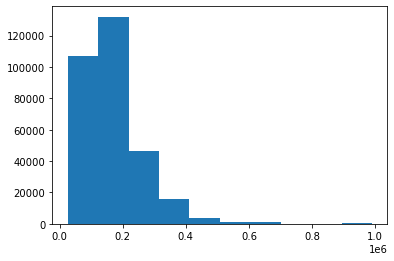

In [22]:
# boolean indexing으로 filtering 후 histogram
income_filter = application_train['AMT_INCOME_TOTAL'] < 1000000
plt.hist(application_train[income_filter]['AMT_INCOME_TOTAL'])

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

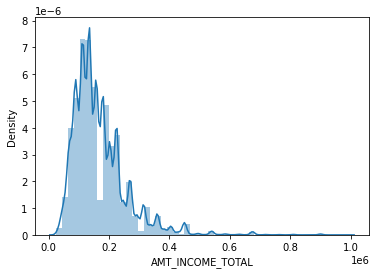

In [23]:
sns.distplot(application_train[income_filter]['AMT_INCOME_TOTAL'])

- sns.violinplot() : 일변량, 연속형 데이터의 분포를 설명하기 위해 사용되는 그래프이다. 커널 밀도 곡선(Kernel Density Curvce)와 박스 플롯을 합친 형태로 밀도를 더 깉이 이해할 수 있다. 

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

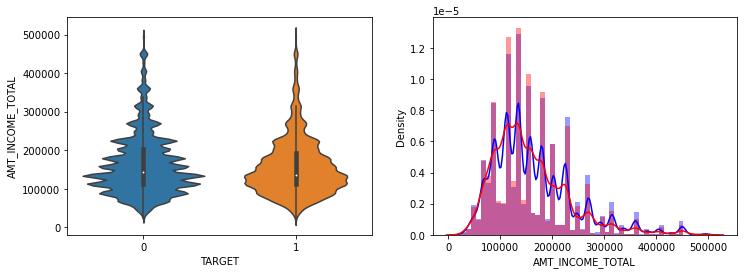

In [24]:
# TARGET 값에 따른 AMT_INCOME_TOTAL값 분포도 비교
target_0 = (application_train['TARGET'] == 0)
target_1 = (application_train['TARGET'] == 1)
fitering = (application_train['AMT_INCOME_TOTAL'] < 500000)

fig, ax = plt.subplots(figsize=(12, 4), nrows=1, ncols=2, squeeze=False)
sns.violinplot(x='TARGET', y='AMT_INCOME_TOTAL', data=application_train[fitering], ax=ax[0,0])
sns.distplot(application_train[target_0 & fitering]['AMT_INCOME_TOTAL'], label='target is 0', color='blue', ax=ax[0,1])
sns.distplot(application_train[target_1 & fitering]['AMT_INCOME_TOTAL'], label='target is 1', color='red', ax=ax[0,1])

## check for missing data
- pd.concat() : 데이터의 속성 형태가 동일한 데이터셋끼리 합칠 때 사용한다.<br> (즉, pandas의 DataFrame 합치는 방법이다.)
    - axis = 0 : 위 + 아래로 DataFrame 합치기(rbind)
    - axis = 1 : 왼쪽 + 오른쪽으로 DataFrame 합치기(cbind)

In [25]:
#application_train.isnull().sum().sort_values(ascending=False)

In [26]:
#(application_train.isnull().sum() / application_train.isnull().count() * 100).sort_values(ascending=False)

In [27]:
missing_val = application_train.isnull().sum().sort_values(ascending=False)
percent = (application_train.isnull().sum() / application_train.isnull().count() * 100).sort_values(ascending=False)
missing_application_train = pd.concat([missing_val, percent], axis=1, keys=['missing values','percent of total values'])
missing_application_train.head(20)

,missing values,percent of total values
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


결측값이 많이 측정되어 삭제할 수 있지만, 아직 불필요한지 알 수 없으므로 유지한다. 

In [28]:
# number of each type of columns
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

- data.select_dtypes(include = 'object') :  object형 데이터와 비object형(숫자형) 데이터를 구분해서 호출해주는 함수이다.
- df['species'].nunique() : 특별한 value의 개수를 나타내는 함수이다.
- df.unique() : 특정한 값 찾는 함수이다.

In [29]:
application_train.select_dtypes('object').nunique(axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

object variables가 상대적으로 적다. 그러므로 이러한 categorical variables를 다룰 방법을 찾을 필요가 있다
<br>
## encoding categorical variables
meachine learning model은 categorical variables를 다루는게 불가능하여, model에 변수를 전달하기 전에 <strong>encode</strong>해야한다.
<br><br>
1. ### Label encoding :
문자를 0부터 시작하는 정수형 숫자로 바꿔주는 기능을 제공한다. <br>
반대로 (라벨)코드숫자를 이용하여 원본 값을 구할 수도 있다.

    - encoder = LabelEncoder() : label encoder 생성한다. 
    - encoder.fit(X_train) : X_train 데이터를 이용 fit한다.
    - encoder.transform(X_train) : label number로 변환한다.
    <br><br>
    - X_test데이터에만 존재하는 새로 출현한 데이터를 신규 클래스로 추가한다 (중요!!!)
    
    
    for label in np.unique(X_test):
        if label not in encoder.classes_: # unseen label 데이터인 경우( )
            # 미처리 시 ValueError발생
            encoder.classes_ = np.append(encoder.classes_, label) 
    X_test_encoded = encoder.transform(X_test)


2. ### One hot encoding (dummy encoding) : 
원핫 인코딩(One-Hot Encoding)은 사람이 매우 쉽게 이해할 수 있는 데이터를 컴퓨터에게 주입시키기 위한 가장 기본적인 방법이다.
간단하게 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방법이다.
<br><br>수치형 데이터로만 바꾸지 않고 굳이 더미로 가변수화한 이유 : 수치형 데이터로만 변환을 하게 되면 서로 간의 관계성이 생기게 된다. 따라서, 사실이 아닌 관계성으로 인해 잘못된 학습이 일어날 수 있으므로 서로 무관한 수, 즉 더미로 만든 가변수로 변환함으로서 그러한 문제를 막아준다!
    - SKlearn (사이킷런 사용 — 레이블 인코딩을 한번 거쳐야해서 상대적으로 복잡) : OneHotEncoder()
    - pandas (get_dummies() 함수 사용)<br>

    - get_dummies의 속성
     - drop_first=True : 열을 n-1개 생성
     - columns = col : dataframe에서 특정 열만 인코딩
     - dummy_na = True : 결측값 처리
     
<br>
<br>
Supervised Learning 의 분류(Classification) 문제에서,  기계에게 학습 시킬 Label 값이 숫자  이외로 되어 있을 경우, 숫자로 먼저 만들어 주는 것이 위에서 한 Label Encoding 이고,  위처럼 한 후에, Loss를 계산하기 쉽게 만들어 주기 위해 벡터의 딱 한개의 요소만 1 이고, 나머지 요소는 모두 0 인 벡터로 만들어 주는 것이 OneHotEncoding 이다.

### Label encoding 

In [30]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
en_count = 0

for col in application_train : 
    if application_train[col].dtype == 'object' : 
        #print(col)
        if len(application_train[col].unique()) <= 2 :
            print(col)
            # train on the training data
            fit_encoder = encoder.fit(application_train[col])
            # transform with training and testing data
            application_train[col] = encoder.transform(application_train[col])
            application_test[col] = encoder.transform(application_test[col])
            en_count += 1
            
print('label encoded is {} columns'.format(en_count))
#print('%d columns were label encoded.' % en_count)

NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
label encoded is 3 columns


### One hot encoding

In [31]:
#pd.get_dummies(application_train)

In [32]:
application_train = pd.get_dummies(application_train)
application_test = pd.get_dummies(application_test)

print('shape of train : ', application_train.shape)
print('shape of test : ', application_test.shape)

shape of train :  (307511, 243)
shape of test :  (48744, 239)


In [33]:
application_train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business 

training data에는 testing data에 나타나지 않는 catgories를 가진 변수들이 존재하기 때문에 training data에는 더 많은 columns들을 만들었다. <br>
testing data에 없는 training data의 columns을 제거하기위해서 <strong>align</strong>함수가 필요하다. 
- align() : 두 객체를 동시에 정렬하는 함수이다. 
    - join='inner' : 두 객체 둘다 있는 인덱스를 교차시킨다. 

In [34]:
train_label = application_train['TARGET']

application_train, application_test = application_train.align(application_test, join='inner', axis=1)

application_train['TARGET'] = train_label

print('shape of train : ', application_train.shape)
print('shape of test : ', application_test.shape)

shape of train :  (307511, 240)
shape of test :  (48744, 239)


### 이상치(Anomalies)를 찾아내는 방법

 이상치 부분에서 우리가 해야하는것은 먼저 이상치가 왜 발생했는지 의미를 파악하는 것이 중요하다. 그리고 그러한 의미를 파악했으면 어떻게 대처해야 할 지 (제거, 대체, 유지 등)를 판단해야 한다. 

이상치를 발견하는 기법은 여러가지 있고 대표적으로 아래와 같은 방법들이 있다. 

1) 개별 데이터 관찰

 데이터 값을 눈으로 쭉 훑어 보면서 전체적인 추세와 특이사항을 관찰 할 수 있다. 데이터가 많다고 앞부분만 보면 안되고, 패턴이 뒤에서 나타날 수도 있으므로 뒤 or 무작위로 표본을 추출해서 관찰한다. 단, 이상값은 작은 크기의 표본에 나타나지 않을 수 있다. 

2) 통계값 활용

 적절한 요약 통계 지표( Summary Statistics)를 사용할 수 있다. 데이터의 중심을 알기 위해서는 평균(mean), 중앙값(median), 최빈값(mode)을 사용할 수 있다. 데이터의 분산도를 알기 위해서는 범위 (range) , 분산(Variance)을 사용할 수 있다. 통계 지표를 이용할 때는 데이터의 특성에 주의해야 한다. 예를 들어, 평균에는 집합 내 모든 데이터 값이 반영되기 때문에, 이상값이 있으면 값이 영향을 받지만, 중앙값에는 가운데 위치한 값 하나가 사용되기 때문에 이상값의 존재에도 대표성이 있는 결과를 얻을 수 있다. 회사 직원들의 연봉에 대해서 평균을 구하면, 대개 중간값보다 훨씬 높게 나오는데, 그것은 몇몇 고액연봉자가 평균을 끌어올렸기 때문이다. 

3) 시각화 활용

 일단은 시각적으로 표현이 되어있는 것을 보면, 분석에 도움이 많이 된다. 시각화를 통해 주어진 데이터의 개별 속성에 어떤 통계 지표가 적절한지 결정할 수 있다. 

 시각화 방법에는 확률밀도 함수, 히스토그램, 점플롯, 워드 클라우드, 시계열 차트 지도 등이 있다. 

4) 머신러닝 기법 활용

 대표적인 머신러닝 기법으로 K-means를 통해 이상치를 확인할 수 있다. <br>


이상치는 숫자 잘못 입력, 측정 장비에 에러가 발생, 극심한 측정 등으로 발생한다.<br>
여기서 이상치를 발견할 수 있는 방법중 하나는 describe() 함수로 컬럼의 통계값들을 보는 것이다. <br>
- DAY_BIRTH의 column은 대출 시점의 고객 일수를 기록되기 때문에 음수이다. 그래서 -1을 곱하고 1년의 일 수로 나눈다.<br>
- DAY_EMPLOYED의 column은 사람이 현재 입사를 지원하기 전에 몇일인지...즉, 입사일

In [35]:
(application_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [36]:
application_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

'DAYS_EMPLOYED'의 최대 최소 값이 차이가 커서 보기에 좋지 않으므로, 히스토그램을 이용하여 살펴본다. 

(array([252137.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  55374.]),
 array([-17912. ,  20403.5,  58719. ,  97034.5, 135350. , 173665.5,
        211981. , 250296.5, 288612. , 326927.5, 365243. ]),
 <BarContainer object of 10 artists>)

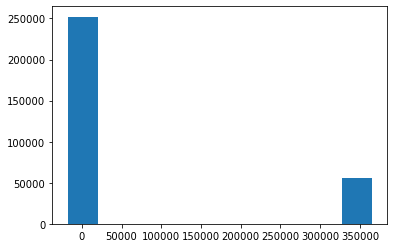

In [37]:
plt.hist(application_train['DAYS_EMPLOYED'])

그리고 application_train의 max를 이용하여 두 value로 나누어본다. 

In [38]:
application_train[application_train['DAYS_EMPLOYED'] == 365243]['TARGET'].mean() 

0.05399646043269404

In [39]:
application_train[application_train['DAYS_EMPLOYED'] != 365243]['TARGET'].mean()

0.0865997453765215

In [40]:
anom = application_train[application_train['DAYS_EMPLOYED'] == 365243]
non_anom = application_train[application_train['DAYS_EMPLOYED'] != 365243]

print('the anomalies on %.2f percent of loans' % (100 * anom['TARGET'].mean()))
print('there are %d anomalies days of employment' % len(anom))
print('\n')
print('the non anomalies on %.2f percent of loans' % (100 * non_anom['TARGET'].mean()))
print('there are %d non anomalies days of employment' % len(non_anom))

the anomalies on 5.40 percent of loans
there are 55374 anomalies days of employment


the non anomalies on 8.66 percent of loans
there are 252137 non anomalies days of employment


anomalies의 값이 더 낮은 percent를 가지고 있다는 것을 알 수 있다. <br>
anomalies를 처리하는 방법으로 machine learning을 시작하기 전에 anomalies를 결측값으로 설정한다. <br>
anomalies value는 모두 동일한 값으로 모든 대출을 공유할 경우를 대비해 같은 값으로 채워넣는다. <br>
그리기 위해 np.nan으로 결측값을 채운 다음 새로운 boolean colum을 만들어본다. 

Text(0.5, 0, 'days employment')

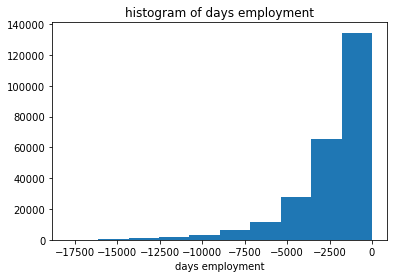

In [41]:
# create new boolean column 
application_train['DAYS_EMPLOYED_ANOM'] = application_train['DAYS_EMPLOYED'] == 365243
 
# replace anomalous values with np.nan
application_train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

# make a histogram
plt.hist(application_train['DAYS_EMPLOYED'])
plt.title('histogram of days employment')
plt.xlabel('days employment')

In [42]:
#application_train['DAYS_EMPLOYED_ANOM']

In [43]:
# create new boolean column in test like train
application_test['DAYS_EMPLOYED_ANOM'] = application_test['DAYS_EMPLOYED'] == 365243
application_test['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

print('there are %d anomnalies in the test data out of %d entries' % (application_test['DAYS_EMPLOYED_ANOM'].sum(), len(application_test)))

there are 9274 anomnalies in the test data out of 48744 entries


### Correlations(상관관계)
두 변수 간의 관련성이 얼마나 강한지를 나타내는 지표이다. <br>
1에 가까울 수록 양의 상관관계이고, -1에 가까울수록 음의 상관관계에 강하다. (0일 때는 관계가 없다.)

<br>

- 피어슨 상관 계수(Pearson Correlation Coefficient ,PCC) : <br>
    두 변수 X 와 Y 간의 선형 상관 관계를 계량화한 수치다 . 피어슨 상관 계수는 코시-슈바르츠 부등식에 의해 +1과 -1 사이의 값을 가지며, +1은 완벽한 양의 선형 상관 관계, 0은 선형 상관 관계 없음, -1은 완벽한 음의 선형 상관 관계를 의미한다. 일반적으로 상관관계는 피어슨 상관관계를 의미한다.
    
<br>
TARGET와 feature의 상관관계관계를 찾아보자.<br>
corr() 함수를 사용하여 Pearson 상관관계를 계산할 수 있다.<br>
correlation coefficient는 feature의 관련성을 나타내기 위한 좋은 방법은 아니지만, 데이터 내에서 가능한 관계에 대한 idea를 알 수 있다.

- 00-.19 “very weak”
- .20-.39 “weak”
- .40-.59 “moderate”
- .60-.79 “strong”
- .80-1.0 “very strong”

In [44]:
corr = application_train.corr()['TARGET'].sort_values()

print('some negativee correlation coefficient :\n', corr.head(10))
print('some positive correlation coefficient :\n', corr.tail(10))

some negativee correlation coefficient :
 EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.046209
DAYS_EMPLOYED_ANOM                     -0.045987
ORGANIZATION_TYPE_XNA                  -0.045987
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
Name: TARGET, dtype: float64
some positive correlation coefficient :
 REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
CODE_GENDER_M                  0.054713
DAYS_LAST_PHONE_CHANGE         0.055218
NAME_INCOME_TYPE_Working       0.057481
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.00000

DAYS_BIRTH column은 양의 상관계수를 가지고 있다. 이 칼럼은 대출 시점의 고객의 일수로 상관 관계는 양수이지만, actual value는 음수이다. 즉, 고객이 나이가 들면 대출에 대한 가능성은 줄어들게 된다. <br>
values of feature을 가지고 상관관계를 음으로 만들어보자.
- abs(x) : 절대값을 구할 수 있는 함수이다. 

In [45]:
# The absolute value(절대값) of DAYS_BIRTH and corr with TARGET variable
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])
application_train['DAYS_BIRTH'].corr(application_train['TARGET'])

-0.07823930830982712

고객이 나이가 들면 부정적인 선형 관계를 알 수 있고 그들은 점점 자주 상환하는 경향을 알 수 있다.<br>
그래서 x축에 나이를 넣어 histogram을 살펴보자.

Text(0.5, 0, 'age')

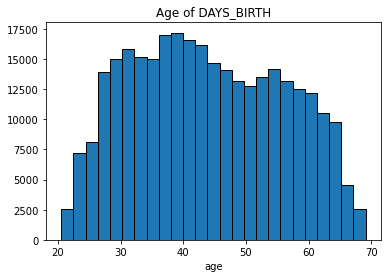

In [46]:
plt.hist(application_train['DAYS_BIRTH'] / 365, bins=25, edgecolor='black')
plt.title('Age of DAYS_BIRTH')
plt.xlabel('age')

age histogram을 살펴보면 특이한 점을 찾아보기 어렵다. 그러므로 대상에 미치는 영향을 시각화해주기 위해, 커널 밀도 추정 KDE를 사용해본다. 
- kdeplot() : 커널 밀도(kernel density)는 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 분포 곡선으로 시각화해줍니다.

In [47]:
#application_train['TARGET'].unique()

In [48]:
application_train.loc[application_train['TARGET'] == 0, 'DAYS_BIRTH']

1         16765
2         19046
3         19005
4         19932
5         16941
          ...  
307505    24384
307506     9327
307507    20775
307508    14966
307510    16856
Name: DAYS_BIRTH, Length: 282686, dtype: int64

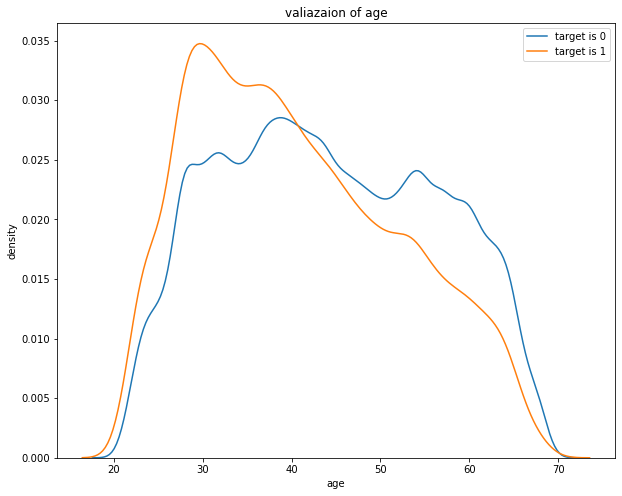

In [49]:
plt.figure(figsize=[10,8])

sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label='target is 0')
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label='target is 1')
plt.title('valiazaion of age')
plt.xlabel('age')
plt.ylabel('density')
plt.legend()
plt.show()

target이 1일 경우 왼쪽으로 치우친다. 사실 여기서 상관 계수가 -0.07로 중요하지 않지만. target에는 영향을 미쳐 machine learning 모델에서 유용하게 사용할 수 있다. <br>

나이를 5년씩 구간을 나누어 target의 평균값으로 계산하여 각 연령의 대출 반환이 되지않는 비율을 알아보자.
- np.linspace(start,stop,num, endpoint=True) : 1차원 배열을 만드는 함수
    ex)bins=np.linspace(train['windspeed'].min()
<br>
<br>
- pd.cut() :  값에 따라 구간을 나누는 함수이다. <br>
    ex) train['AgeGroup'] = pd.cut(train['Age'], bins, labels=labels)
<br><br>
- groupby() : 같은 값을 하나로 묶어 통계 또는 집계 결과를 얻기 위해 사용<br>(집단, 그룹별로 데이터를 집계)
    - as_index=True : 인덱스로 사용하고 싶을 경우 사용 <br>ex) df.groupby('city').mean()<br>ex) df.groupby(['city', 'fruits'], as_index=False).mean()
<br>
<br>

In [50]:
application_train['TARGET'].describe()

count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

In [51]:
age_data = application_train[['TARGET','DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

age_data['YEARS_SECTION'] = pd.cut(age_data['YEARS_BIRTH'], bins=np.linspace(20, 70, 11))
age_data.head(20)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_SECTION
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [52]:
# group by the YEAR_SECTION and calculate average
age_groupby = age_data.groupby('YEARS_SECTION').mean()
age_groupby

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_SECTION,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


In [53]:
age_groupby.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 10 entries, (20.0, 25.0] to (65.0, 70.0]
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TARGET       10 non-null     float64
 1   DAYS_BIRTH   10 non-null     float64
 2   YEARS_BIRTH  10 non-null     float64
dtypes: float64(3)
memory usage: 730.0 bytes


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(20.0, 25.0]'),
  Text(1, 0, '(25.0, 30.0]'),
  Text(2, 0, '(30.0, 35.0]'),
  Text(3, 0, '(35.0, 40.0]'),
  Text(4, 0, '(40.0, 45.0]'),
  Text(5, 0, '(45.0, 50.0]'),
  Text(6, 0, '(50.0, 55.0]'),
  Text(7, 0, '(55.0, 60.0]'),
  Text(8, 0, '(60.0, 65.0]'),
  Text(9, 0, '(65.0, 70.0]')])

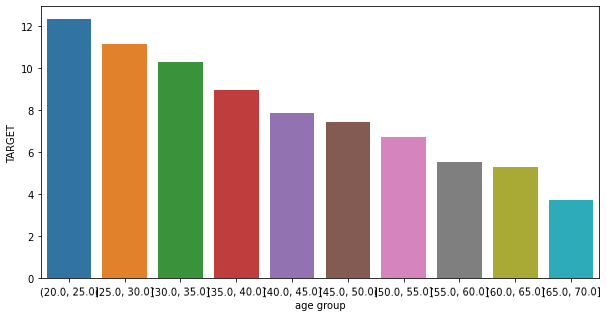

In [54]:
plt.figure(figsize=[10,5])
sns.barplot(age_groupby.index, age_groupby['TARGET'] * 100)
plt.xlabel('age group')
plt.xticks(rotation=0.7)

 연령대가 낮은 사람들은 대출을 상환하지 않을 가능성이 높다. 젋은 3개의 그룹은 10% 이상이고 제일 나이가 많은 그룹은 5%이하라는 것을 알수 있다. <br>

application_train에서 target과의 상관 계수에서 음의 상관 계수가 가장 높았던 3개의 변수인 EXT_SOURCE_3, EXT_SOURCE_2, EXT_SOURCE_1이다. 이러한 features는 외부 데이터에서 가져온 정규화된 score를 나타낸다. 즉, 수많은 데이터들을 이용하여 누적된 신용 등급(credit rating)을 말한다. <br>

먼저 EXT_SOURCE feature들을 target과 함께 서로의 상관 관계를 살펴보자. 

In [55]:
ext_data = application_train[['TARGET', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH']] 
ext_data_corr = ext_data.corr()
ext_data_corr

,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH
TARGET,1.000000,-0.178919,-0.160472,-0.155317,-0.078239
EXT_SOURCE_3,-0.178919,1.000000,0.109167,0.186846,0.205478
EXT_SOURCE_2,-0.160472,0.109167,1.000000,0.213982,0.091996
EXT_SOURCE_1,-0.155317,0.186846,0.213982,1.000000,0.600610
DAYS_BIRTH,-0.078239,0.205478,0.091996,0.600610,1.000000


Text(0.5, 1.0, 'correlations of extsource')

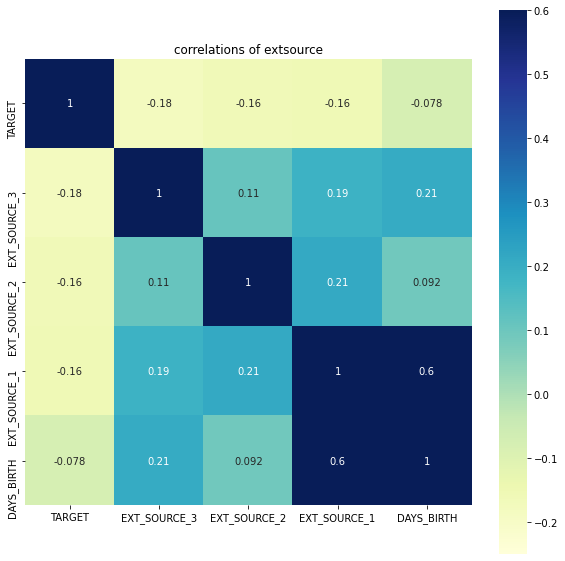

In [56]:
plt.figure(figsize=[10,10])

sns.heatmap(ext_data_corr, square=True, annot=True, cmap='YlGnBu', vmin=-0.25, vmax=0.6)
plt.title('correlations of extsource')

EXT_SOURCE의 with TARGET 속성들은 모두 음의 상관 계수를 다시 알 수 있고, EXT_SOURCE의 가치가 증가하면 고객은 대출을 많이 상환한다는 것을 의미한다. <br>

DAYS_BIRTH with EXT_SOURCE 속성은 양의 상관 관계를 보아 score 중 하나는 고객의 나이일 것으로 추정할 수 있다. <br>

그 다음은 각각의 EXT_SOURCE features와 TARGET value을 시각화하여 살펴보자.
- enumerate() : '열거하다'라는 뜻으로, 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아 인덱스 값을 포함하는 enumerate 객체를 리턴하는 함수이다.<br> 보통 enumerate 함수는 for문과 함께 자주 사용됩니다.
- tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None) : 자동으로 명시된 여백에 관련된 subplot parameter를 조정하는 함수이다. 
    - pad : figure의 모서리와 subplot의 모서리의 여백을 설정
    - h_pad, w_pad : subplot과 edge간의 높이 및 너비의 여백을 설정
    - rect : subplot를 넣기 위한 사각형을 설정

i :  0 , source :  EXT_SOURCE_1
i :  1 , source :  EXT_SOURCE_2
i :  2 , source :  EXT_SOURCE_3


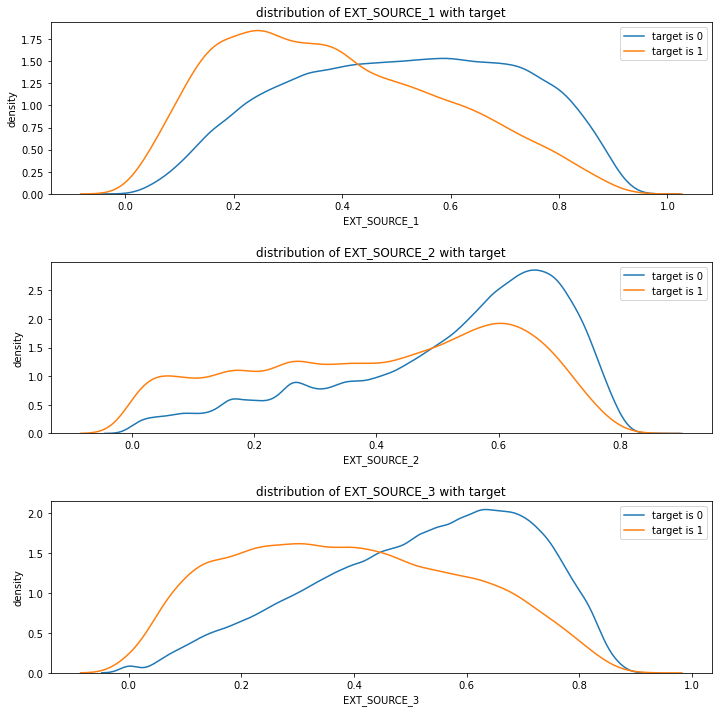

In [57]:
plt.figure(figsize=[10,10])

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']) : 
    plt.subplot(3,1,i+1)
    print('i : ',i, ', source : ',source)
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, source], label='target is 0')
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, source], label='target is 1')
    plt.title('distribution of %s with target' % source)
    plt.xlabel('%s' % source)
    plt.ylabel('density')
    plt.legend()
    
plt.tight_layout(h_pad=2)

EXT_SOURCE_3 with TARGET은 차이가 크게 보인다. 그렇게 대출을 상환하는 지원자의 가능성이 관련있다는 것을 알 수 있다. <br>
이러한 value는 machine learning model에서 지원자가 제 시간에 대출을 상환할지 아닌지에 대하여 예측하는데 유용할 것이다. 

## Feature Engineering

Feature Engineering은 머신러닝 알고리즘을 작동하기 위해 데이터에 대한 도메인 지식을 활용하여 특징(Feature)를 만들어내는 과정이다. 다른 정의를 살펴보면, 머신러닝 모델을 위한 데이터 테이블의 컬럼(특징)을 생성하거나 선택하는 작업을 의미한다.
<br><br>
먼저 충분한 데이터를 먼저 모으고 어떤 feature가 유용한지 아닌지 확인하는 과정을 거친다. feature가 유용한지 아닌지 확인하는 과정을 특징 선택(feature selection) 또는 특징 추출(feature extraction) 이라고 한다. 해당 과정은 기존 입력을 토대로 새로운 입력 데이터를 만들기 때문에 보통 learning 과정 전에 실행된다.
<br><br>
두 가지의 feature construcion method로 살펴보자.
- Polynomial Features
- Domain Knowledge Features

<br>
참고 url : https://c11.kr/nt4l


### Polynomial Features

데이터들간의 관계가 비선형일 때 데이터에 각 feature의 제곱값이 추가된 비선형 데이터를 선형 회귀 모델로 훈련시키는 것이다. <br><br>
곡선 형태를 띄는 데이터를 제곱, 세제곱의 값으로 만들어서 일차방정식이 되도록 할 수 다. 그리고 dataset의 feature를 조정하여 다항식을 일차방정식으로 만들면 Gradient Descent 같은 알고리즘을 사용해서 학습시킬 수 있다.<br><br>
예로, EXT_SOURCE_1^2 and EXT_SOURCE_2^2 and also variables such as EXT_SOURCE_1 x EXT_SOURCE_2, EXT_SOURCE_1 x EXT_SOURCE_2^2, EXT_SOURCE_1^2 x EXT_SOURCE_2^2 등이 있다. <br><br>
각각의 두 변수는 target과 큰 영향을 가지고 있지 않으며, 단일 상호 변수들이 함께 결합하여 target과의 관계를 보여준다. <br>
그렇게 고객이 대출을 반환할지 안 할지를 예언하는데 도움이 될 수 있는지 알아보기 위해 시도를 해보자.
<br><br>
- Imputer : sklearn 전처리 함수 결측치 대체한다. <br>default form : Imputer(missing_values, strategy, axis, verbose, copy)
    * missing_values
        - default = 'NaN'
        - 해당 데이터 내에서 결측치 값
        - 예를 들어, 만약 NaN 대신, 결측치가 -1로 채워져 있다면, missing_values = -1 로 작성해야 한다.
    * strategy
        - 결측치를 대체할 값
        - default = 'mean'
        - median, most_frequent 등도 사용 가능하다.
    * axis
        - 방향 설정
        - axis = 0 or 1
    * verbose
        - default = 0
    * copy
        - default = True
        - True일 경우, X의 복사본이 만드러진다.
 
<br> 
sklearn의 imputer 객체의 fit() 함수는 훈련 dataset에서 빈 데이터가 나올 수 있어 채워주는 역할을 한다. <br>
SimpleImputer을 이용하여 중간값으로 채우주기위해 fit_transform 해서 중간값을 계산했다. 
 <br> <br>
참고 url : https://url.kr/f4v2py

In [58]:
# make a new dataframe 
poly_train = application_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_test = application_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# sklearn 전처리 함수 결측치 대체하는 Imputer
from sklearn.impute import SimpleImputer
simple_imputer = SimpleImputer(strategy='median')

poly_target = poly_train['TARGET']
poly_train = poly_train.drop(columns='TARGET')

poly_train = simple_imputer.fit_transform(poly_train)
poly_test = simple_imputer.transform(poly_test)

In [59]:
#poly_train

In [60]:
#poly_test

PolynomialFeatures을 사용하여 훈련 세트에 있는 각 특성을 제곱하여 새로운 특성으로 추가한 훈련된 데이터를 만들어보자. 

In [61]:
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(degree=3)

In [62]:
fit_poly_feat = poly_feat.fit(poly_train)

In [63]:
poly_train = fit_poly_feat.transform(poly_train)
poly_test = fit_poly_feat.transform(poly_test)

print('polynomial train features shape : ', poly_train.shape)
print('polynomial test features shape : ', poly_test.shape)

polynomial train features shape :  (307511, 35)
polynomial test features shape :  (48744, 35)


- get_feature_names() : polynomial features에 적용한 변수이름 확인하는 함수이다. 

In [64]:
poly_feat.get_feature_names(input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2^2',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_3^2',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_2^2 EXT_SOURCE_3',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3 DAYS_BIRTH^2',
 'DAYS_BIRTH^3']

35개의 features가 포함되어 있고, 이러한 새로운 feature와 target의 상관 관계를 확인할 수 있다. 

In [65]:
poly_train_df = pd.DataFrame(poly_train, columns=poly_feat.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

poly_train_df['TARGET'] = poly_target

poly_corr = poly_train_df.corr()['TARGET'].sort_values()

In [66]:
poly_corr.head()

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
Name: TARGET, dtype: float64

In [67]:
poly_corr.tail()

DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64

여러개의 새로운 변수는 기본 features보다 target과의 상관 관계가 더 좋다. 이러한 feature은 모델 학습에 도움이 되는지 확인하기위해 feature들이 있을 때와 없을 때를 시도할 수 있다. 

In [68]:
poly_test_df = pd.DataFrame(poly_test, columns=poly_feat.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# merge polynomial features into training dataframe
poly_train_df['SK_ID_CURR'] = application_train['SK_ID_CURR']
application_train_ploy = application_train.merge(poly_train_df, on='SK_ID_CURR', how='left')

# merge polnomial features into testing dataframe
poly_test_df['SK_ID_CURR'] = application_test['SK_ID_CURR']
application_test_ploy = application_test.merge(poly_test_df, on='SK_ID_CURR', how='left')

# align the dataframes
application_train_ploy, application_test_ploy = application_train_ploy.align(application_test_ploy, join='inner', axis=1)

print('training data with polynomial feat shape : ', application_train_ploy.shape)
print('testing data with polynomial feat shape : ', application_test_ploy.shape)

training data with polynomial feat shape :  (307511, 275)
testing data with polynomial feat shape :  (48744, 275)


### Domain Knowledge Features

고객이 대출에 대해 채무불이행을 할 것인지에 대한 여부가 중요하다고 생각되어 그것을 포착하도록 시도해본다. 
- CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
- ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
- CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
- DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

In [69]:
domain_train= application_train.copy()
domain_test = application_test.copy()

domain_train['CREDIT_INCOME_PERCENT'] = domain_train['AMT_CREDIT'] / domain_train['AMT_INCOME_TOTAL']
domain_train['ANNUITY_INCOME_PERCENT'] = domain_train['AMT_ANNUITY'] / domain_train['AMT_INCOME_TOTAL']
domain_train['CREDIT_TERM'] = domain_train['AMT_ANNUITY'] / domain_train['AMT_CREDIT']
domain_train['DAYS_EMPLOYED_PERCENT'] = domain_train['DAYS_EMPLOYED'] / domain_train['DAYS_BIRTH']

In [70]:
domain_train['AMT_CREDIT']

0          406597.5
1         1293502.5
2          135000.0
3          312682.5
4          513000.0
            ...    
307506     254700.0
307507     269550.0
307508     677664.0
307509     370107.0
307510     675000.0
Name: AMT_CREDIT, Length: 307511, dtype: float64

In [71]:
domain_test['CREDIT_INCOME_PERCENT'] = domain_test['AMT_CREDIT'] / domain_test['AMT_INCOME_TOTAL']
domain_test['ANNUITY_INCOME_PERCENT'] = domain_test['AMT_ANNUITY'] / domain_test['AMT_INCOME_TOTAL']
domain_test['CREDIT_TERM'] = domain_test['AMT_ANNUITY'] / domain_test['AMT_CREDIT']
domain_test['DAYS_EMPLOYED_PERCENT'] = domain_test['DAYS_EMPLOYED'] / domain_test['DAYS_BIRTH']

i :  0 , feature :  CREDIT_INCOME_PERCENT
i :  1 , feature :  ANNUITY_INCOME_PERCENT
i :  2 , feature :  CREDIT_TERM
i :  3 , feature :  DAYS_EMPLOYED_PERCENT


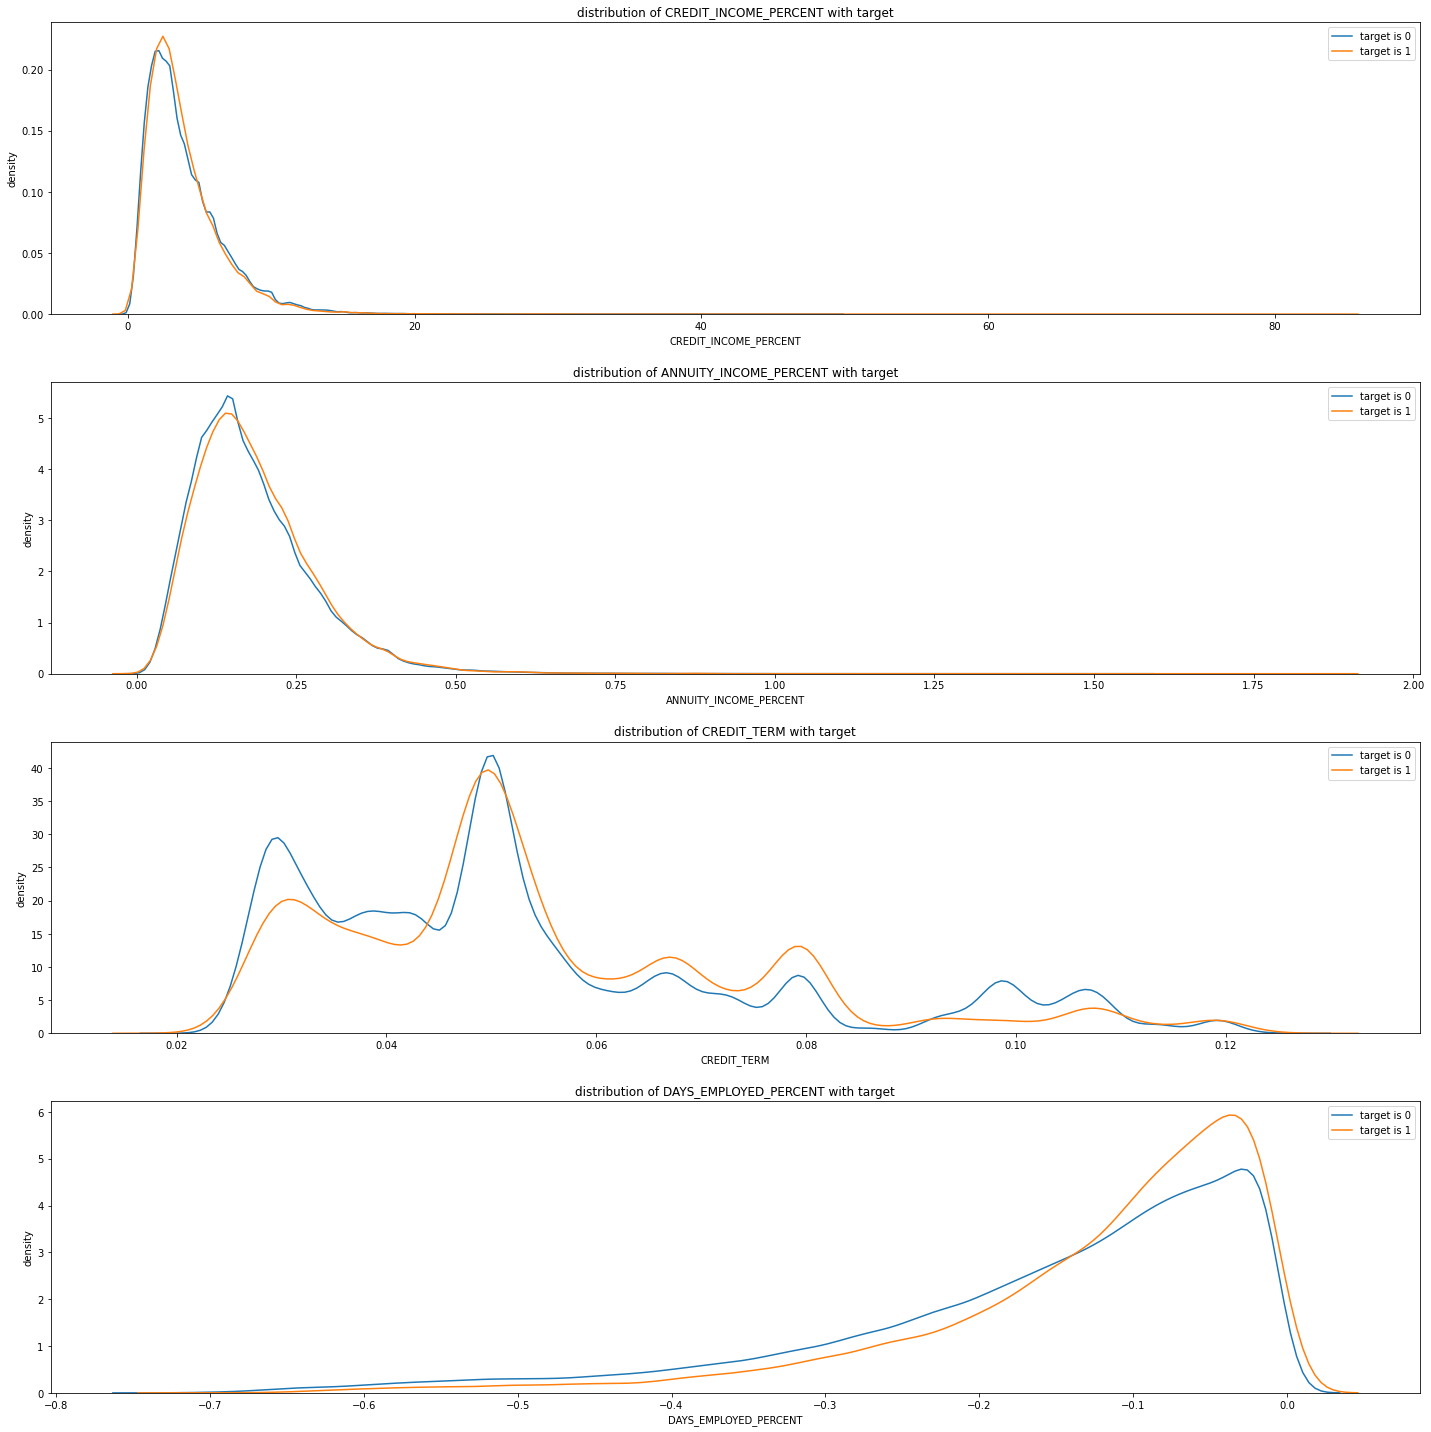

In [72]:
# visualize domain knowledge feature
plt.figure(figsize=(20,20))

for i, feat in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']) :
    plt.subplot(4,1,i+1)
    print('i : ',i, ', feature : ', feat)
    sns.kdeplot(domain_train.loc[domain_train['TARGET'] == 0, feat], label='target is 0')
    sns.kdeplot(domain_train.loc[domain_train['TARGET'] == 1, feat], label='target is 1')
    plt.title('distribution of %s with target' % feat)
    plt.xlabel('%s' % feat)
    plt.ylabel('density')
    plt.legend()
    
plt.tight_layout(h_pad=2)

### Baseline

testing set의 모든 예에서 같은 값을 추축할 수 있다. 대출을 갚지 못할 확률을 예측하고자 하면, 확실할 수 없어 test set의 모든 관측치에 0.5라고 추측할 것이다. 이렇게 하면 AUC ROC(Reciever Operating Characteristic Area Under the Curve)값이 0.5를 얻을 것이다. <br>

이미 언떤 score을 받을지 알고 있으므로, 원래의 기준선을 추축이 필요없다. 그래서 실제 기준선에 더 정교한 모델을 사용하해보자.
<br><br>
## Logistic Regression

baseline을 얻기 위해, categorical 변수를 encoding한 후 모든 features을 사용한다. 결측값을 채우고 features의 범위를 정규화하여 데이터를 사전 분석(전처리)한다. 
<br><br>

### Scaling - MinMaxScaler
데이터를 모델링하기 전에는 반드시 스케일링 과정을 거쳐야 한다. 스케일링을 통해 다차원의 값들을 비교 분석하기 쉽게 만들어주며, 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지 하고, 독립 변수의 공분산 행렬의 조건수(condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상 시킨다.<br><br>
특히 k-means 등 거리 기반의 모델에서는 스케일링이 매우 중요하다.<br><br>
아래와 같은 경우에 로그 함수 혹은 제곱근 함수 등을 사용하여 변환된 변수를 사용하면 회귀 성능이 향상될 수도 있다.
- 독립 변수나 종속 변수가 심하게 한쪽으로 치우친 분포를 보이는 경우 
- 독립 변수와 종속 변수간의 관계가 곱셈 혹은 나눗셉으로 연결된 경우 
- 종속 변수와 예측치가 비선형 관계를 보이는 경우<br>

###### Scaling의 종류
1. StandardScaler : 기본 스케일. 평균과 표준편차 사용
2. MinMaxScaler : 최대/최소값이 각각 1, 0이 되도록 스케일링
3. MaxAbsScaler : 최대절대값과 0이 각각 1, 0이 되도록 스케일링
4. RobustScaler : 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화

<br>
여기서 MinMaxScaler는 모든 feature 값이 0~1사이에 있도록 데이터를 재조정한다. 다만 이상치가 있는 경우 변환된 값이 매우 좁은 범위로 압축될 수 있다.

즉, MinMaxScaler 역시 아웃라이어의 존재에 매우 민감하다.
 <br><br>
ex) from sklearn.preprocessing import MinMaxScaler<br>
minMaxScaler = MinMaxScaler()<br>
print(minMaxScaler.fit(train_data))<br>
train_data_minMaxScaled = minMaxScaler.transform(train_data)

In [73]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# TARGET변수는 결측치처리 및 Scaling대상아니므로, drop TARGET value of training data
if 'TARGET' in application_train : 
    train = application_train.drop(columns=['TARGET'])
else : 
    train = application_train.copy()
    
# name of value
train_col = list(train.columns)

# copy the testing data
test = application_test.copy()

# missing value를 median값으로 처리(imputer)
imputer = SimpleImputer(strategy='median')

# 각 feature를 0-1로 스케일하기
scaler = MinMaxScaler(feature_range=(0, 1))

In [74]:
fit_imputer = imputer.fit(train)

In [75]:
train = fit_imputer.transform(train)
test = fit_imputer.transform(test)

In [76]:
fit_scaler = scaler.fit(train)

In [77]:
train = fit_scaler.transform(train)
test = fit_scaler.transform(test)

In [78]:
print('training data shape : ', train.shape)
print('testing data shape : ', test.shape)

training data shape :  (307511, 240)
testing data shape :  (48744, 240)


#### Logistic Regression
logistic regression을 사용하여 과적합의 양을 제어하는 정규화 매개 변수인 C를 낮출것이다. 그러면 기본 logistic regression보다 더 나은 결과를 얻을 수 있지만, 낮은 bar가 설정된다. <br>
scikit_learn 모델링 구문을 사용하여 먼저 모델을 생성한 다음 fit하여 모델을 학습시킨다. 그리고 predict_proba를 사용하여 testing data를 예측해볼 것이다. 0 또는 1이 아닌 확률을 살펴보자. 

In [79]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(C = 0.0001)

fit_logistic = logistic.fit(train, train_label)

대출을 상환하지 않는 가능성을 예측하기 위해 predict_proba 함수를 사용한다.<br> <br> 
여기서 predict_proba() 함수는 만약 분류 결과가 아니라, 해당 레이블로 분류될 확률 값을 알고 싶은 경우 사용해주면 된다. 당연히 각 샘플에 대한 확률을 0에서 1사이의 값으로 돌려줄 거다.<br><br> 
m이 관측치 수로 하여 m x 2 array를 반환한다. <br><br> 
첫 번째 column은 target이 0일 확률이고 두 번째 column은 target이 1일 확률이다. (따라서 단일 행의 경우, 두 열은 1로 합해야 한다. )<br><br> 
대출을 상환하지 않는 가능성을 원하므로 두번째 column을 선택할 것이다. 

In [80]:
# select the second column
pred_logistic = fit_logistic.predict_proba(test)[ : , 1]

In [81]:
pred_logistic

array([0.07851458, 0.1379263 , 0.08219367, ..., 0.07722466, 0.08238891,
       0.10213534])

prediction이 SK_ID_CURR와 TARGET의 columns이 있는 기본 제출 파일 형식이어야 하므로, 제출할 test set과 prediction을 dataframe 형식으로 만들어야한다. 

In [82]:
# make the form of dataframe
submit = application_test[['SK_ID_CURR']]
submit['TARGET'] = pred_logistic

In [83]:
submit.head()

,SK_ID_CURR,TARGET
0,100001,0.078515
1,100005,0.137926
2,100013,0.082194
3,100028,0.080921
4,100038,0.132618


그렇게 대출을 상환하지 않는 가능성이 0과 1사이에서 나타난다.

In [84]:
submit.to_csv('submission_1.csv', index=False)

- LogisticRegression Score : 0.67887

 ### Random Forest

더 좋은 성능을 위해 Random Forest Algorithm을 사용하여 어떤 영향을 미치는지 알아보자.

- RandomForestClassifier
    - n_estimators : 생성할 의사결정 나무 개수 
    - random_state : 난수의 초기값
    - verbose : 실행 과정 출력 여부
    - n_jobs : 적합성과 예측성을 위해 병렬로 실행할 작업 수
<br><br>
- .feature_importances_ : 변수별 중요도 추출

In [85]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [86]:
fit_rf = rf.fit(train, train_label)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished


In [87]:
feat_importance_value = rf.feature_importances_
feat_importance_df = pd.DataFrame({'feature' : train_col, 'importance' : feat_importance_value})

In [88]:
pred_rf = fit_rf.predict_proba(test)[ : , 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.1s finished


In [89]:
# make the form of dataframe
submit2 = application_test[['SK_ID_CURR']]
submit2['TARGET'] = pred_rf

In [90]:
submit.head()

,SK_ID_CURR,TARGET
0,100001,0.078515
1,100005,0.137926
2,100013,0.082194
3,100028,0.080921
4,100038,0.132618


In [91]:
submit2.to_csv('submission_2.csv', index=False)

- RandomForest Score : 0.67877

### Make Predictions using Engineered Features

#### Polynomial Features

Polynomial 기반으로 만든 feature로 예측을 해보자.

In [92]:
poly_train_col = list(application_train_ploy.columns)

#impute the poly features
imputer_poly = SimpleImputer(strategy='median')

poly_train_feat = imputer_poly.fit_transform(application_train_ploy)
poly_test_feat = imputer_poly.transform(application_test_ploy)

# 각 feature를 0-1로 스케일하기
scaler = MinMaxScaler(feature_range=(0, 1))

poly_train_feat = scaler.fit_transform(poly_train_feat)
poly_test_feat = scaler.transform(poly_test_feat)

In [93]:
rf_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [96]:
fit_rf_poly = rf_poly.fit(poly_train_feat, train_label)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.7min finished


In [97]:
pred_rf_poly = fit_rf_poly.predict_proba(poly_test_feat)[ : , 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished


In [98]:
# make the form of dataframe
submit3 = application_test[['SK_ID_CURR']]
submit3['TARGET'] = pred_rf_poly

In [99]:
submit3.to_csv('submission_3.csv', index=False)

- Random Forest engineered Score : 0.60467

### Feature Engineering - Domain knowledge

Domain기반으로 만든 feature로 예측해보자

In [100]:
domain_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATIO

In [101]:
domain_train = domain_train.drop(columns='TARGET')

domain_train_col = list(domain_train.columns)

#impute the poly features
imputer_domain = SimpleImputer(strategy='median')

domain_train_feat = imputer_domain.fit_transform(domain_train)
domain_test_feat = imputer_domain.transform(domain_test)

# 각 feature를 0-1로 스케일하기
scaler_domain = MinMaxScaler(feature_range=(0, 1))

domain_train_feat = scaler_domain.fit_transform(domain_train_feat)
domain_test_feat = scaler_domain.transform(domain_test_feat)

In [102]:
rf_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [103]:
fit_rf_domain = rf_domain.fit(domain_train_feat, train_label)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished


In [105]:
# Extract feature importances
feature_importance_values_domain = fit_rf_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_train_col, 'importance': feature_importance_values_domain})

In [1]:
pred_rf_domain = fit_rf_domain.predict_proba(domain_test_feat)[ : , 1]

NameError: name 'fit_rf_domain' is not defined

In [ ]:
# make the form of dataframe
submit4 = application_test[['SK_ID_CURR']]
submit4['TARGET'] = pred_rf_domain

In [ ]:
submit4.to_csv('submission_4.csv', index=False)

- Random Forest domain features : 0.67996